# IS 362 Assignment 13 – Preprocessing Data for scikit-learn

Very often, we’re tasked with taking data in one form and transforming it for easier downstream analysis.  In this assignment, you’ll use what you’ve learned in the course to prepare data for predictive analysis in Project 4.
### Mushrooms Dataset. 
- A famous—if slightly moldy—dataset about mushrooms can be found in the UCI repository here: https://archive.ics.uci.edu/ml/datasets/Mushroom.  The fact that this is such a well-known dataset in the data science community has made it a good dataset to use for comparative benchmarking.  For example, if someone was working to build a better decision tree algorithm (or other predictive classifier) to analyze categorical data, this dataset could be useful.  In Project 4, we’ll use scikit-learnto answer the question, “Which other attribute or attributes are the best predictors of whether a particular mushroom is poisonous or edible?”

#### Your assignment is to 
* First study the dataset and the associated description of the data (i.e. “data dictionary”).  You may need to look around a bit, but it’s there!   
* Create a pandas DataFramewith a subset of the columns in the dataset.  You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing. 
* Add meaningful names for each column. 
* Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1.  This is because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics.
* Perform exploratory data analysis:  show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.
* Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous.

- Your deliverable is a Jupyter Notebook that performs these transformation and exploratory data analysis tasks.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline

##### 1. Downloaded data from https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data

###### 2. Creating a pandas DataFramewith a subset of the columns in the dataset.

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
df_mushroom = pd.read_csv(url, usecols=[0,3,5], header=None, names=['Mushroom_sample', 'Cap-Color', 'Odor'])
df_mushroom.head()


,Mushroom_sample,Cap-Color,Odor
0,p,n,p
1,e,y,a
2,e,w,l
3,p,w,p
4,e,g,n


- Replaced the codes used in the data with numeric values. 

In [3]:
df_mushroom.replace(to_replace={"Mushroom_sample":{'p':1, 'e':0}}, inplace = True)
df_mushroom.replace(to_replace={"Cap-Color":{'n':0, 'b':1, 'c':2, 'g':3, 'r':4, 'p':5, 'u':6, 'e':7, 'w':8, 'y':9}}, inplace=True)
df_mushroom.replace(to_replace={"Odor":{'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}}, inplace=True)
df_mushroom.head()

,Mushroom_sample,Cap-Color,Odor
0,1,0,7
1,0,9,0
2,0,8,1
3,1,8,7
4,0,3,6


In [4]:
mushroom_graph = df_mushroom['Mushroom_sample'].value_counts()
mushroom_graph

0    4208
1    3916
Name: Mushroom_sample, dtype: int64

- Based on the graph below, there are more edible mushrooms than poisonous.

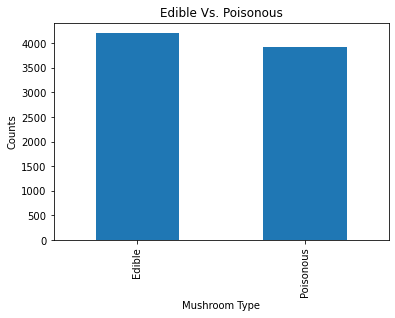

In [6]:
mushroom_graph.plot(kind='bar')
names = ['Edible', 'Poisonous']
values = [0,1]

plt.title('Edible Vs. Poisonous')
plt.xlabel('Mushroom Type')
plt.ylabel('Counts')
plt.xticks([i for i, _ in enumerate(names)], names)
plt.show()

In [7]:
cap_colorgraph = df_mushroom['Cap-Color'].value_counts()
cap_colorgraph

0    2284
3    1840
7    1500
9    1072
8    1040
1     168
5     144
2      44
6      16
4      16
Name: Cap-Color, dtype: int64

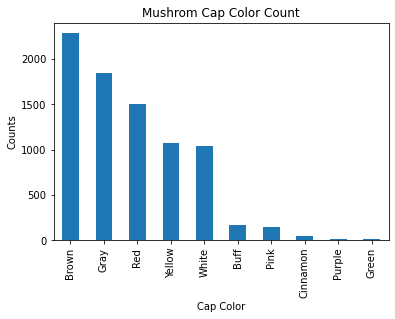

In [8]:
# Cap_Colors: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
#'Cap-Colors':{'n':0,'b':1,'c':2,'g':3,'r':4,'p':5,'u':6,'e':7,'w':8,'y':9}
cap_colorgraph.plot(kind='bar')
cap_colors = ['Brown', 'Gray', 'Red','Yellow','White', 'Buff', 'Pink', 'Cinnamon', 'Purple', 'Green']
values = [0,1,2,3,4,5,6,7,8,9]

plt.title('Mushrom Cap Color Count')
plt.xlabel('Cap Color')
plt.ylabel('Counts')
plt.xticks([i for i, _ in enumerate(cap_colors)], cap_colors)
plt.show()

In [9]:
odor_graph = df_mushroom['Odor'].value_counts()
odor_graph

6    3528
4    2160
3     576
8     576
1     400
0     400
7     256
2     192
5      36
Name: Odor, dtype: int64

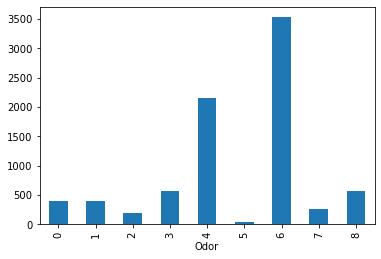

In [10]:
odor_graph = df_mushroom.groupby("Odor").size()
odor_graph.plot(kind="bar")

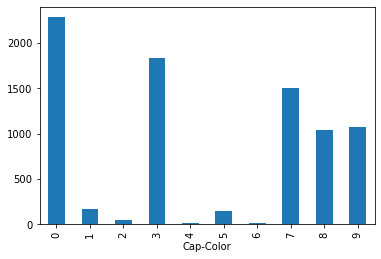

In [11]:
odor_graph = df_mushroom.groupby("Cap-Color").size()
odor_graph.plot(kind="bar")